The aim of this notebook is to introduce Julia programming language, from installation to basic operations, functions and plotting utilities. The notebook provide some examples on computations of finite differences.


# Installation

The installation of Julia on your computer is pretty straightforward from the official website: https://julialang.org/downloads/. Select the appropriate version for your operating system, download it and follow in the instruction process. 

In the course I will be using Jupyter notebook to introduce code. It is an open-source web application to create and share live code. The ability to modify parts of the code and rerun only the moidified parts makes it an attractive option for doing courses. You do not have to install it but if you would like to, here is some instructions on how to do so. 

One easy way to install Jupyter notebook is via python. Make sure you have both Python and pip, a package manager for python, installed on your computer. Run 

```pip install jupyter ```

After installation you can run jupyter notebook by typing 

```jupyter notebook```

Contact me if you have problems in installation. 


# Arrays and matrices

Arrays and matrices will be useful data structures in our course. Arrays are actually vectors. An example of an array of integers is 

In [5]:
a = [1,2,3]

3-element Vector{Int64}:
 1
 2
 3

Similarly, one can define an array of floats

In [6]:
a = [1., 2., 3.]

3-element Vector{Float64}:
 1.0
 2.0
 3.0

There exist also some useful built-in functions to generate arrays. For example, to generate a vector of zeros with lenght 5, one can write 

In [7]:
a = zeros(5)

5-element Vector{Float64}:
 0.0
 0.0
 0.0
 0.0
 0.0

Similiarly, one can use built-in functions to generate vectors of ones, of random numbers, etc. Matrices can be defined simililarly. To defin a matrix of two rows and three columns one can write 

In [9]:
a = [1 2 3; 4 5 6]

2×3 Matrix{Int64}:
 1  2  3
 4  5  6

Similarly, one can use built-in functions

In [10]:
a = zeros(4,3)

4×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0
 0.0  0.0  0.0

# Element-wise operations on arrays

Consider the array

In [11]:
a = [-pi, pi]

2-element Vector{Float64}:
 -3.141592653589793
  3.141592653589793

and say you want to compute the sin function, element-wise on a. You might be tempted to write

In [12]:
sin(a)

LoadError: MethodError: no method matching sin(::Vector{Float64})
[0mClosest candidates are:
[0m  sin([91m::T[39m) where T<:Union{Float32, Float64} at special/trig.jl:29
[0m  sin([91m::LinearAlgebra.Hermitian{var"#s885", S} where {var"#s885"<:Complex, S<:(AbstractMatrix{<:var"#s885"})}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:731
[0m  sin([91m::Union{LinearAlgebra.Hermitian{var"#s886", S}, LinearAlgebra.Symmetric{var"#s886", S}} where {var"#s886"<:Real, S}[39m) at /Applications/Julia-1.8.app/Contents/Resources/julia/share/julia/stdlib/v1.8/LinearAlgebra/src/symmetric.jl:727
[0m  ...

Note that this did not work. Element-wise operations in Julia are defined via the dot notation for implementational efficiency, i.e., one writes 

In [13]:
sin.(a)

2-element Vector{Float64}:
 -1.2246467991473532e-16
  1.2246467991473532e-16

# Functions 

A standard way to define functions in Julia is as follows. 

In [16]:
function f(x)
    return x + 5 
end 

f (generic function with 1 method)

Here, f adds 5 to all elements of an input array

In [19]:
f(5)

10

In [20]:
f(x) = x + 5

f (generic function with 1 method)

In [21]:
f.([5, 7])

2-element Vector{Int64}:
 10
 12

# Control loops 

Control loops can be implemented in a similar way to the standard function notation. The following two examples compute the factorial of some integer.

In [30]:
n = 8

fac = 1
while n>=1
    if n == 0
        fac = 1
    else
        fac *= n
        n -= 1
    end 
end

print(fac)

40320

Similarly via a for loop

In [31]:
n = 4

fac = 1
if n != 0
    for i in 1:1:n
        fac *= i
    end
end 

fac

24

Remark: People who use Python or similar high-level programming languages are advised not to use for-loops when possible, and replace them, when possible, by functions provided by libraries such as numpy. This is because, functions in numpy are written and lower-level languages and are hence faster to compile. However, Julia employs Just-In-Time (JIT) compilation. This means that the only the necessary code is compiled during run-time. Hence, one can safely feel less guilty when writing for loops in Julia :). 

# Plotting 

To plot one can use the "Plots" package. 

In [32]:
using Plots

To plot a sin function on some grid x one can write

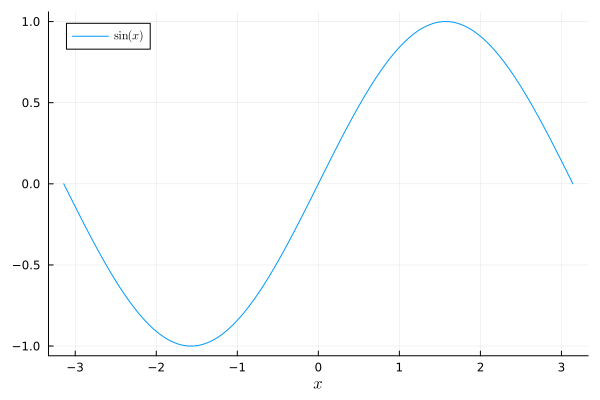

In [33]:
x = range(-pi, pi, length=1000)
y = sin.(x)
plot(x, y, label=raw"$\sin(x)$", xlabel=raw"$x$")

where the raw string macro allows to write in equation mode. 

To plot another function on the same graph, one can write

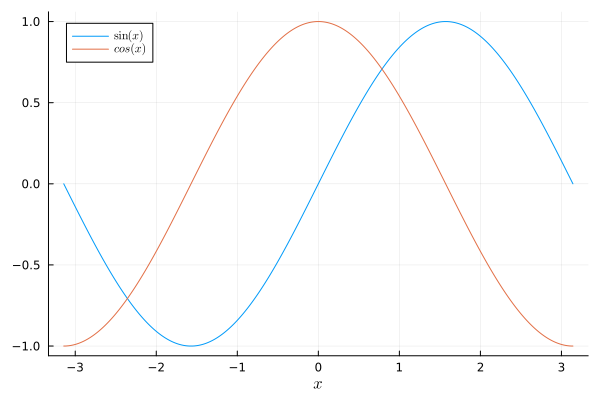

In [34]:
plot!(x, cos.(x), label=raw"$cos(x)$")

# Putting things together: a finite difference scheme

Glad you made it sofar :) Let us try now to do some useful stuff with the stuff we learned. In particular, let us try to define a forward first order difference scheme to compute the derivative of a decaying cosine function. We start by defining the function under consideration on a grid and plotting it.

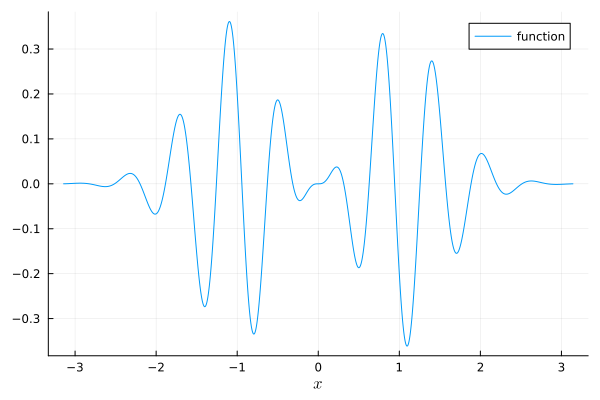

In [38]:
x = range(-pi, pi, length=10000)
f(x) = (sin(10*x))*(x^2)*(exp(-x^2))
# plotting the function 
plot(x, f.(x), xlabel=raw"$x$", label="function")

In [39]:
# Let us define the exact derivative of f
df(x) = 10*cos(10*x)*(x^2)*(exp(-x^2)) + 2*x*sin(10*x)*(exp(-x^2)) - 2x*(sin(10*x))*(x^2)*(exp(-x^2))
# the finite difference scheme
dx = 0.1
df_approx(x) = (f(x+dx)-f(x))/dx

df_approx (generic function with 1 method)

Let's plot both the approximate derivative and the exact one.

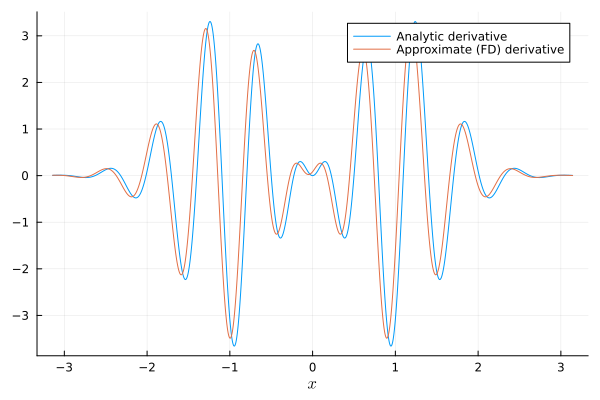

In [40]:
plot(x,df.(x),xlabel=raw"$x$",label="Analytic derivative")
plot!(x,df_approx.(x),xlabel=raw"$x$",label="Approximate (FD) derivative")


# Outside the box: other methods to compute derivatives on a computer 

The programming excercizes revolve around implementing finite difference methods and using them to approximate solutions of (partial) differential equations. However, it makes also sense to have an idea about other methods to compute derivatives of functions on a computer. One famous method is the so-called "automatic differentiation". This approach relies on decomposing complex functions into elementary ones, whose derivative are known. Then, the final derivative can be computed via chain rule. For example, to compute the derivative of 

$$
f(x) = \exp(\sin(x^2))
$$

one represents $f$ on the computer as $f = f_1 \circ f_2 \circ f_3 \circ id$, where $f_1(x) = \exp(x)$, $f_2(x) = \sin(x)$, $f_3(x) = x^2$, and $id(x) = x$ are the elementary functions making up $f$. On a computer, each of this elementary functions is stored along with its derivative. The derivative of $f$ is inferred by chain rule. 

Automatic differentiation is one of the main tools of machine learning and computational physics. Since this topic falls out of the scope of the class, we do not implement automatic differentation, and look instead at ForwardDiff, a library that finds derivatives of functions by automatic differentiation. 

Note here that the derivatives are exact up to the machine percision.

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
   Installed StaticArraysCore ───── v1.4.0
   Installed DiffResults ────────── v1.1.0
   Installed DiffRules ──────────── v1.13.0
   Installed ForwardDiff ────────── v0.10.35
   Installed CommonSubexpressions ─ v0.3.0
   Installed StaticArrays ───────── v1.5.21
    Updating `~/.julia/environments/v1.8/Project.toml`
  [f6369f11] + ForwardDiff v0.10.35
    Updating `~/.julia/environments/v1.8/Manifest.toml`
  [bbf7d656] + CommonSubexpressions v0.3.0
  [163ba53b] + DiffResults v1.1.0
  [b552c78f] + DiffRules v1.13.0
  [f6369f11] + ForwardDiff v0.10.35
  [90137ffa] + StaticArrays v1.5.21
  [1e83bf80] + StaticArraysCore v1.4.0
Precompiling project...
  ✓ DiffRules
  ✓ StaticArraysCore
  ✓ CommonSubexpressions
  ✓ DiffResults
  ✓ StaticArrays
  ✓ ForwardDiff
  6 dependencies successfully precompiled in 11 seconds. 141 already precompiled.


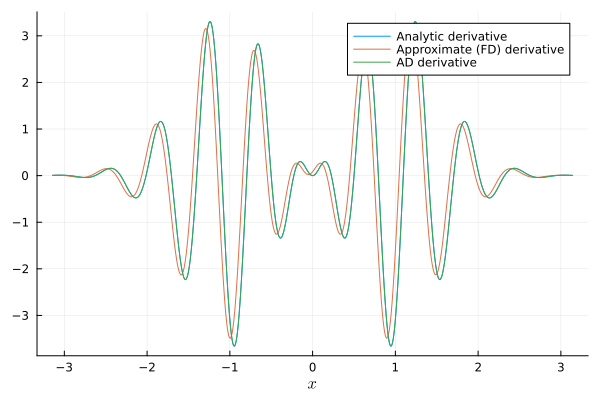

In [42]:
import Pkg; Pkg.add("ForwardDiff")
using ForwardDiff 
df_autdiff(x) = ForwardDiff.derivative(f,x)
plot!(x,df_autdiff.(x),xlabel=raw"$x$",label="AD derivative")


Another useful approach to compute derivatives on a computer is using symbolic computation. Here, objects (variables, functions, operators) are repsented as formulas. Operations on these objects are then performed via algebraic rules. This is similar to working out expressions on a paper. Since symbolic computation is out of the scope of the present course, we only look at an example using a famous library. 

In [1]:
using SymPy

# define the variable x as a symbol
x = Sym("x")
# define the expression of a function that depends on x


[ Info: Precompiling SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6]

signal (6): Abort trap: 6
in expression starting at /Users/salehyah/.julia/packages/SymPy/jTadH/src/SymPy.jl:35
__pthread_kill at /usr/lib/system/libsystem_kernel.dylib (unknown line)
Allocations: 2504 (Pool: 2495; Big: 9); GC: 0


ErrorException: [91mFailed to precompile SymPy [24249f21-da20-56a4-8eb1-6a02cf4ae2e6] to /Users/salehyah/.julia/compiled/v1.4/SymPy/KzewI_jqpbo.ji.[39m

UndefVarError: [91mUndefVarError: sympy not defined[39m